# 卷積神經網絡(Convolutional Neural Network)CNN

## Convolution 的用法

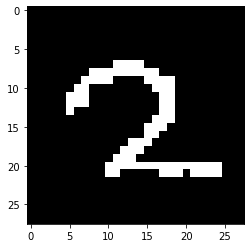

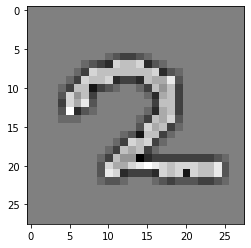

In [4]:
%matplotlib inline
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

temp = np.array([ [-1, -1, -1],
                  [-1,  8, -1],
                  [-1, -1, -1] ], dtype='float32')

# change kernel to 4D tensor
# tf.reshape(tensor, shape, name=None)
'''
tf.reshape(tensor,shape,name=None)
函數的作用是將tensor變換為參數shape形式，其中的shape為一個列表形式，特殊的是列表可以實現逆序的遍歷，
即list(-1).-1所代表的含義是我們不用親自去指定這一維的大小，函數會自動進行計算，但是列表中只能存在一個-1。
'''
kernel = tf.reshape(tf.Variable(temp), [3, 3, 1, 1]) #[3, 3, 1, 1] ==>濾波器形狀為 3*3*1 數量為1張
#print(kernel) 

raw_image = cv2.imread('test_img.jpg', 0)
_, threshold_image = cv2.threshold(raw_image, 0, 255, cv2.THRESH_OTSU)

threshold_image= threshold_image.astype('float32')

# change image to 4D tensor
x_img = tf.reshape(threshold_image, [-1, threshold_image.shape[0], threshold_image.shape[1], 1])

y_conv = tf.nn.conv2d(x_img, kernel, strides=[1, 1, 1, 1], padding='SAME')


result_img = np.reshape(y_conv, [threshold_image.shape[0], threshold_image.shape[1]])
    
plt.imshow(threshold_image, cmap='gray')
plt.show()
    
plt.imshow(result_img, cmap='gray')
plt.show()

## Maxpooling的用法

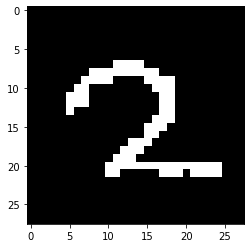

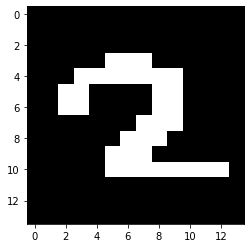

In [10]:
%matplotlib inline
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


raw_image = cv2.imread('test_img.jpg', 0)
_, threshold_image = cv2.threshold(raw_image, 0, 255, cv2.THRESH_OTSU)

threshold_image= threshold_image.astype('float32')

# change image to 4D tensor
x_img = tf.reshape(threshold_image, [-1, threshold_image.shape[0], threshold_image.shape[1], 1])

# ksize = [1, width, height, 1]
# strides = [1, horizontal strides, vertical strides, 1]
# 因為一次水平滑兩格，垂直也滑兩格--------------|----------------------\(這兩個[1,2,2,1])的關係
#                                           ____                  ____ 
y_maxpool = tf.nn.max_pool(x_img, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


result_img = np.reshape(y_maxpool, [14, 14])
    
plt.imshow(threshold_image, cmap='gray')
plt.show()
    
plt.imshow(result_img, cmap='gray')
plt.show()

# 創建CNN網路架構

In [24]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

tf.compat.v1.reset_default_graph()

class CNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(
            filters=32,             # 卷積層神經元（卷積核）數目
            kernel_size=[5, 5],     # 接受區的大小
            padding='same',         # padding策略（vaild 或 same）
            activation=tf.nn.relu   # 激活函数

        )
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2)
        self.conv2 = tf.keras.layers.Conv2D(
            filters=64,
            kernel_size=[5, 5],
            padding='same',
            activation=tf.nn.relu
        )
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2)
        self.flatten = tf.keras.layers.Reshape(target_shape=(7 * 7 * 64,))
        self.dense1 = tf.keras.layers.Dense(units=1024, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(units=10)

    def call(self, inputs):
        x = self.conv1(inputs)                  # [batch_size, 28, 28, 32]
        x = self.pool1(x)                       # [batch_size, 14, 14, 32]
        x = self.conv2(x)                       # [batch_size, 14, 14, 64]
        x = self.pool2(x)                       # [batch_size, 7, 7, 64]
        x = self.flatten(x)                     # [batch_size, 7 * 7 * 64]
        x = self.dense1(x)                      # [batch_size, 1024]
        x = self.dense2(x)                      # [batch_size, 10]
        output = tf.nn.softmax(x)
        return output

model = CNN()
model.build(input_shape=(None,28, 28, 1))
print(model.summary())

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
reshape (Reshape)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  3212288   
_________________________________________________________________
dense_1 (Dense)              multiple                  10250   

# 創建CNN網路架構(keras)

In [1]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

tf.compat.v1.reset_default_graph() #tf.reset_default_graph函數用於清除默認圖形堆棧並重置全局默認圖形

model = tf.keras.Sequential()
model.add(layers.Conv2D(input_shape=(28, 28, 1),
                        filters=32, kernel_size=(3,3), strides=(1,1), padding='same',
                       activation='relu'))
#filters (濾波器個數)

model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())   #進行池化
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                200736    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 201,386
Trainable params: 201,386
Non-trainable params: 0
_________________________________________________________________


## 卷積神經網絡介紹(Convolutional Neural Network)

* ### 經過各兩次的Convolution, Pooling, Fully Connected就是CNN的架構

## 1.Convolution Layer卷積層
* 卷積運算就是將原始圖片的與特定的Feature Detector(filter)做卷積運算(符號⊗)，卷積運算就是將下圖兩個3x3的矩陣作相乘後再相加，以下圖為例 0*0 + 0*0 + 0*1+ 0*1 + 1 *0 + 0*0 + 0*0 + 0*1 + 0*1 =0

![Alt text](./img/Convolution_Layer.png)

* 中間的Feature Detector(Filter)會隨機產生好幾種(ex:16種)，Feature Detector的目的就是幫助我們萃取出圖片當中的一些特徵(ex:形狀)，就像人的大腦在判斷這個圖片是什麼東西也是根據形狀來推測
* 使用Relu函數去掉負值，更能淬煉出物體的形狀
![Alt text](./img/Relu_function.png)

* 其他函數
![Alt text](./img/Other_function.png)


## 2. Pooling Layer 池化層
* 在Pooling Layer這邊主要是採用Max Pooling，Max Pooling的概念很簡單只要挑出矩陣當中的最大值，Max Pooling 主要的好處是當圖片整個平移幾個Pixel的話對判斷上完全不會造成影響，以及有很好的抗雜訊功能。
![Alt text](./img/Max_Pooling1.png)

![Alt text](./img/Max_Pooling2.png)

## 3. Fully Connected Layer 全連接層
* 在整個 CNN model 中，如果說前面的 Convolution layer 是為了把 Feature 從Input Image中取出來，Fully connected layer就是為了把萃取來的Feature 對映(Mapping) 到樣本Label的空間(Space)中做Classification

* 簡單來說Fully Connected Layer就是將之前的結果平坦化後連接到最基本的神經網絡
![Alt text](./img/Fully_Connected_Layer.png)

## 整體流程
![Alt text](./img/Overall_process.png)

## 實作

In [30]:
import numpy as np
import pandas as pd 
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

In [4]:
# 載入Mnist手寫辨識資料
keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [14]:
(x_Train, y_Train), (x_test, y_test) = keras.datasets.mnist.load_data()
print('x_Train image:', x_Train.shape)
print('y_Train label:', y_Train.shape)
print("====================")
print('x_test image:', x_test.shape)
print('y_test label:', y_test.shape)

#Training的資料有60000筆
#Testing的資料有10000筆
#都是28*28 pixel大小的手寫數字圖片

x_Train image: (60000, 28, 28)
y_Train label: (60000,)
x_test image: (10000, 28, 28)
y_test label: (10000,)


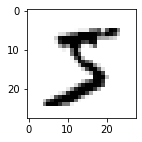

In [15]:
# 畫出圖片長相以及Label
fig = plt.gcf()
fig.set_size_inches(2, 2)
plt.imshow(x_Train[0], cmap='binary')
plt.show()

In [16]:
y_Train[0]

5

由於圖片通常是RGB三個顏色所組成的，假設圖片大小是28*28的彩色圖片，實際上的資料維度就是28*28*3。不過這邊數字的顏色都是單色因此我們轉成28*28*1的資料維度當作未來CNN Model的input

In [24]:
# 多加一個顏色維度
x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')
x_Train4D.shape

(60000, 28, 28, 1)

灰階的圖片數值為0~255之間，我們將它縮放到0~1之間，並對類別資料做onehot-encoding處理

In [25]:
#將數值縮小到 0-1
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [31]:
# 把類別作成 One hot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_test)

In [32]:
y_Train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [33]:
y_TrainOneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [34]:
model = tf.keras.Sequential()

model.add(Conv2D(input_shape=(28, 28, 1),
                        filters=16, 
                        kernel_size=(5,5), 
                        padding='same', 
                        activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(input_shape=(28, 28, 1),
                        filters=36, 
                        kernel_size=(5,5), 
                        padding='same', 
                        activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())   #進行池化
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [35]:
# 訓練模型
# 可用損失函數 https://keras.io/zh/losses/
#多分類問題：
#對於多分類問題，在選擇損失函數loss時，主要是看數據是如何編碼的：
#1.如果是分類編碼（one-hot編碼），則使用categorical_crossentropy
#2.如果是整數編碼，則使用sparse_categorical_crossentropy
#整數編碼就是對所有標籤都放到一個向量中，每個標籤對應向量的一個值

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x= x_Train4D_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=300, verbose=2)


Epoch 1/10
160/160 - 23s - loss: 0.5142 - accuracy: 0.8426 - val_loss: 0.1289 - val_accuracy: 0.9620
Epoch 2/10
160/160 - 26s - loss: 0.1210 - accuracy: 0.9632 - val_loss: 0.0866 - val_accuracy: 0.9751
Epoch 3/10
160/160 - 28s - loss: 0.0862 - accuracy: 0.9736 - val_loss: 0.0727 - val_accuracy: 0.9774
Epoch 4/10
160/160 - 29s - loss: 0.0685 - accuracy: 0.9794 - val_loss: 0.0524 - val_accuracy: 0.9842
Epoch 5/10
160/160 - 29s - loss: 0.0586 - accuracy: 0.9821 - val_loss: 0.0483 - val_accuracy: 0.9857
Epoch 6/10
160/160 - 30s - loss: 0.0493 - accuracy: 0.9849 - val_loss: 0.0525 - val_accuracy: 0.9851
Epoch 7/10
160/160 - 28s - loss: 0.0434 - accuracy: 0.9868 - val_loss: 0.0399 - val_accuracy: 0.9887
Epoch 8/10
160/160 - 29s - loss: 0.0404 - accuracy: 0.9871 - val_loss: 0.0440 - val_accuracy: 0.9859
Epoch 9/10
160/160 - 30s - loss: 0.0368 - accuracy: 0.9882 - val_loss: 0.0386 - val_accuracy: 0.9882
Epoch 10/10
160/160 - 35s - loss: 0.0337 - accuracy: 0.9890 - val_loss: 0.0436 - val_accura

In [36]:
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

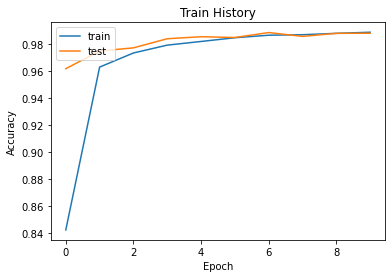

In [37]:
show_train_history('accuracy','val_accuracy')

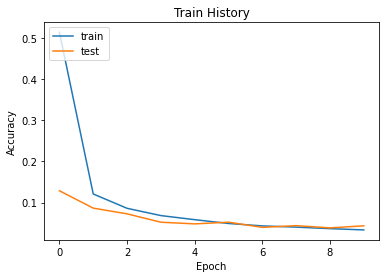

In [38]:
show_train_history('loss','val_loss')

In [39]:
#評估模型準確率
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

313/313 [==============================] - 2s 6ms/step - loss: 0.0332 - accuracy: 0.9888


0.9887999892234802

In [40]:
# 預測結果
prediction=model.predict_classes(x_Test4D_normalize)
prediction[:10]

C:\Users\Tibame_T14\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [41]:
# 查看預測結果
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1
        if idx >= len(images):
            break
    plt.show()

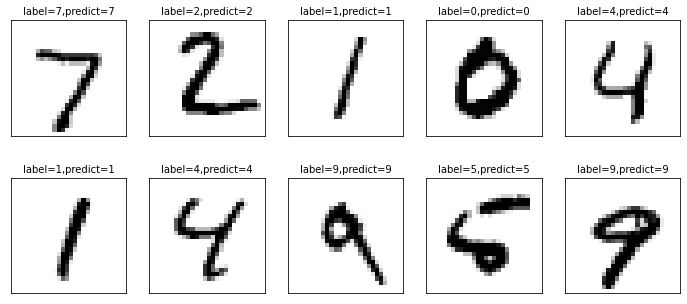

In [43]:
plot_images_labels_prediction(x_test,y_test,prediction,idx=0)

In [45]:
# confusion matrix
pd.crosstab(y_test,prediction, rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,974,0,0,0,0,0,2,1,3,0
1,0,1132,1,0,0,0,1,1,0,0
2,1,2,1021,0,2,0,0,3,3,0
3,1,0,1,1000,0,1,0,4,3,0
4,0,1,0,0,976,0,0,0,1,4
5,2,0,0,6,0,866,5,1,11,1
6,3,2,0,1,1,0,946,0,5,0
7,0,3,5,2,0,0,0,1014,2,2
8,2,0,1,0,1,0,0,2,967,1


In [46]:
df = pd.DataFrame({'label':y_test, 'predict':prediction})
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
2035,5,3
2597,5,3
4360,5,3
5937,5,3


In [47]:
df[(df.label==5)&(df.predict==3)].index

Int64Index([340, 1393, 2035, 2597, 4360, 5937], dtype='int64')

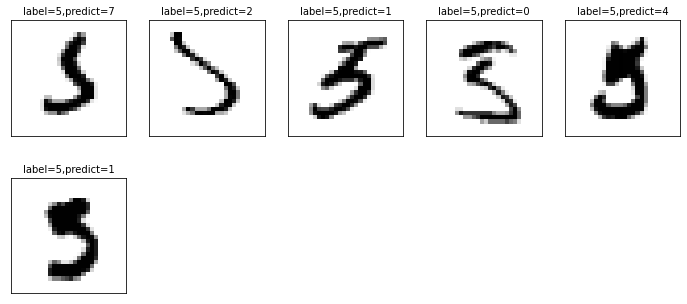

In [49]:
plot_images_labels_prediction([x_test[i] for i in df[(df.label==5)&(df.predict==3)].index],[y_test[i] for i in df[(df.label==5)&(df.predict==3)].index],prediction,idx=0)